In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
%matplotlib inline

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city",how="outer")

# Display the data table for preview
merge_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [83]:
merge_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

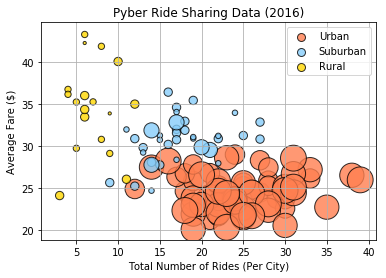

In [98]:
## URBAN ##

# Dataset to use 
type_urban = merge_df.loc[merge_df["type"] == "Urban", :]

# Axis 
urban_x = type_urban.groupby("city").count().ride_id
urban_y = type_urban.groupby("city").mean().fare
urban_z = type_urban["driver_count"]

# Plot 
plt.scatter(urban_x, urban_y, s=(urban_z)*10, alpha=0.8, facecolors="coral", edgecolors="black",linewidths=1, \
           label="Urban")


## SUBURBAN ##

# Dataset to use
type_suburban = merge_df.loc[merge_df["type"] == 'Suburban', :]

# Axis 
suburban_x = type_suburban.groupby("city").count().ride_id  #this is the x
suburban_y = type_suburban.groupby("city").mean().fare
suburban_z = type_suburban["driver_count"]

# Plot 
plt.scatter(suburban_x, suburban_y, s=(suburban_z)*10, alpha=0.8, facecolors="lightskyblue", edgecolors="black", \
            linewidths=1, label="Suburban")

## RURAL ##

# Dataset to use
type_rural = merge_df.loc[merge_df["type"] == 'Rural', :]

# Axis 
rural_x = type_rural.groupby("city").count().ride_id  #this is the x
rural_y = type_rural.groupby("city").mean().fare
rural_z = type_rural["driver_count"]

# Plot 
plt.scatter(rural_x, rural_y, s=(rural_z)*10, alpha=0.8, facecolors="Gold", edgecolors="black",linewidths=1, \
           label = "Rural")


## Plot labels,legend and more ##
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# To set size of legend points
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection

def update(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([64])
plt.legend(loc="upper right", prop={'size': 10},handler_map={PathCollection : HandlerPathCollection(update_func=update)} )


# Voila! 
plt.show()

## Total Fares by City Type

(-1.1154091474866084,
 1.1690507613050525,
 -1.1118514118737242,
 1.1467813852359487)

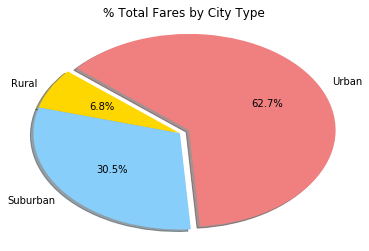

In [5]:
# Calculate Type Percents
cityfare_count = merge_df.groupby("type").sum().fare
cityfare_sum = merge_df.sum().fare

total_fare = round((cityfare_count / cityfare_sum)*100,1)

# Build Pie Chart
explode = (0, 0, 0.07)
labels = ["Rural","Suburban","Urban"]
plt.title("% Total Fares by City Type")
colors = ['gold','lightskyblue','lightcoral']

# Show Figure
plt.pie(total_fare, explode=explode, labels=labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=140)

# Make it as an ellipse 
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Total Fares by City Type.png")


## Total Rides by City Type

(-1.1098013853799644,
 1.1852980011020589,
 -1.0943227568031937,
 1.137590829571888)

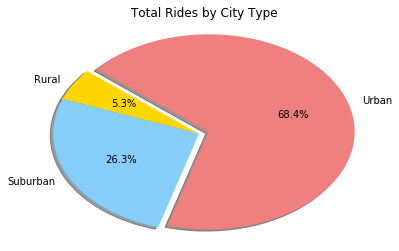

In [10]:
# Calculate Ride Percents
cityrides_count = merge_df.groupby("type").count().date
cityrides_sum = merge_df.count().date
rides_by_city = round((cityrides_count / cityrides_sum)*100,1)

# Build Pie Chart
explode = (0, 0, 0.07)
labels = ["Rural","Suburban","Urban"]
plt.title("Total Rides by City Type")
colors = ['gold','lightskyblue','lightcoral']

# Show Figure
plt.pie(rides_by_city, explode=explode, labels=labels,colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Make it as an ellipse 
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Total Rides by City Type.png")

## Total Drivers by City Type

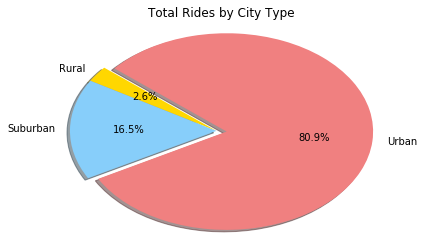

In [11]:
# Calculate Driver Percents 
plot_count = city_df.groupby("type").sum().driver_count
plot_sum = city_df.sum().driver_count
plot_final = round((plot_count / plot_sum)*100,1)

#Plot
explode = (0, 0, 0.07)
plt.title("Total Rides by City Type")
colors = ['gold','lightskyblue','lightcoral']
labels = ["Rural","Suburban","Urban"]

# Show Figure
plt.pie(plot_final,colors=colors, explode=explode,labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)

# Make it as an ellipse 
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Total Drivers by City Type.png")